<a href="https://colab.research.google.com/github/R1dhoeee/Kecerdasan-Buatan-4/blob/main/Ridho%20Bintang%20Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review: computer vision transfer learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is a subset of lesson 1 of https://course.fast.ai

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%.

In [ ]:
import numpy as np


In [ ]:
# path = untar_data(URLs.PETS)
path_anno = '/content/drive/MyDrive/kecerdasan_buatan/annotations/annotations/'
path_img = '/content/drive/MyDrive/kecerdasan_buatan/images/images/'
np.random.seed(2)
# Import get_image_files specifically
from fastai.vision.data import get_image_files
fnames = get_image_files(path_img)
fnames[0]

Path('/content/drive/MyDrive/kecerdasan_buatan/images/images/yorkshire_terrier_168.jpg')

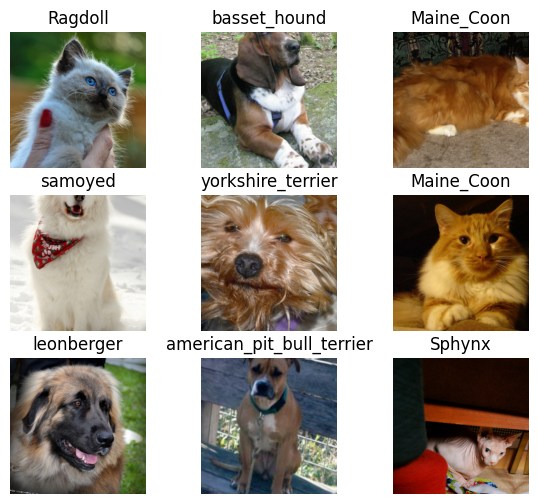

In [ ]:
# Fix the missing quote in the regex pattern
pat = r'([^/]+)_\d+\.jpg$'


# Explicitly import DataBlock and related components from the correct location
from fastai.vision.all import *


# Define the data block
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # Inputs are images, outputs are categories
    get_items=get_image_files, # Function to get all image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Split data into training and validation
    get_y=using_attr(RegexLabeller(pat), 'name'), # Function to get the label from the filename
    item_tfms=Resize(460), # Apply transformations to individual items (images)
    batch_tfms=aug_transforms(size=224, min_scale=0.75) # Apply augmentation to batches
)

# Create the dataloaders
dls = pets.dataloaders(path_img, bs=bs)

# Normalize the data (this is done implicitly with the aug_transforms in the DataBlock)
# dls = dls.normalize(imagenet_stats) # This line is no longer needed here

# Show a batch of data
dls.show_batch(max_n=9, figsize=(7,6))  # ✔️ Benar


# Update the learner to use the new dataloaders
# Ensure models is imported from fastai.vision
from fastai.vision.models import resnet34

## Training

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 214MB/s]


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.928280,0.347688,0.106225,48:11
1,0.629234,0.280125,0.079161,01:19
2,0.480434,0.241715,0.075778,01:19
3,0.377006,0.219316,0.066982,01:18


In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [15]:
learn.fit_one_cycle(2, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.378418,0.223593,0.071719,01:25
1,0.306325,0.221419,0.067659,01:25


In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', np.int64(7)),
 ('Bengal', 'Egyptian_Mau', np.int64(5)),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', np.int64(5)),
 ('British_Shorthair', 'Russian_Blue', np.int64(3)),
 ('Ragdoll', 'Birman', np.int64(3)),
 ('chihuahua', 'miniature_pinscher', np.int64(3)),
 ('english_cocker_spaniel', 'english_setter', np.int64(3)),
 ('miniature_pinscher', 'chihuahua', np.int64(3)),
 ('Abyssinian', 'Russian_Blue', np.int64(2)),
 ('Bengal', 'Abyssinian', np.int64(2)),
 ('Maine_Coon', 'Ragdoll', np.int64(2)),
 ('Siamese', 'Birman', np.int64(2)),
 ('american_pit_bull_terrier', 'american_bulldog', np.int64(2)),
 ('american_pit_bull_terrier', 'miniature_pinscher', np.int64(2)),
 ('beagle', 'basset_hound', np.int64(2)),
 ('boxer', 'american_bulldog', np.int64(2)),
 ('boxer', 'staffordshire_bull_terrier', np.int64(2)),
 ('german_shorthaired', 'beagle', np.int64(2))]